# Aritmética modular

## Ejercicio 1

Implementa el algoritmo extendido de Euclides para el cálculo del máximo común divisor: dados dos enteros $a$ y $b$, encuentra $u, v \in \mathbb{Z}$ tales que $au + bv$ es el máximo común divisor de $a$ y $b$.

In [1]:
def ext_euclides(a, b):
    if b == 0:
        return a, 1, 0
    else:
        u1, u2, v1, v2 = 0, 1, 1, 0
        
        while b > 0: # Mientras que b sea mayor que 0
            q = a // b                                     # a = |_ a / b _|
            r, u, v = a - q * b, u2 - q * u1, v2 - q * v1  # r = a - qb, u = u2 - qu1, v = v2 -qv1
            a, b, u2, u1, v2, v1 = b, r, u1, u, v1, v      
            
        return a, u2, v2
    

d, u, v = ext_euclides(4864, 3458)
print("d = ", d, " u = ", u, " v = ", v)

d =  38  u =  32  v =  -45


En el código podemos ver como la función `ext_euclides` recibe como parámetros de entrada dos enteros $a$ y $b$ y devuelve el máximo común divisor, seguidos por $u$ y $v$. 

La función sigue el ejemplo de código del algoritmo _2.107_ de [A. Menezes, P. van Oorschot, and S. Vanstone, Handbook of Applied Cryptography, CRC Press, 1996.](http://cacr.uwaterloo.ca/hac/about/chap2.pdf)

## Ejercicio 2

Usando el ejercicio anterior, escribe una función que calcule $a^{-1} \bmod b$ para cualesquiera $a, b$ enteros que sean primos relativos.

In [2]:
def inverse(a,b):
    return ext_euclides(a,b)[1]


inverse(2, 5)

-2

A partir del código del ejercicio 1, en caso de que exista inversa en $\mathbb{Z}_n$, obtendremos lo siguiente: $$d = au + bv$$ En caso de que $a$ tenga inversa en $\mathbb{Z}_n$, tendremos que $\text{mcd}(a,n) = 1$. Por tanto, por la identidad de Bezout, tenemos que existen $u$ y $v$ (coeficientes de Bezout) tal que: $$1 = ua + vn$$

Por tanto, si estamos en el espacio $\mathbb{Z}_n$, tenemos que $$ \begin{matrix}1 = ua + vn & =& ua + 0 \\ & \Rightarrow & ua & a \in \mathcal{U}(\mathbb{Z}_n)\\  u & = & a^{-1} \end{matrix}$$

## Ejercicio 3

Escribe una función que calcule $a^b \bmod n$ para cualesquiera $a, b\text{ y } n$. La implementación debe tener en cuenta la representación binaria de $b$.

In [3]:
def big_pow(a, b, n):
    if b == 1:
        return a % n
    
    if a == 1:
        return 1
    
    a0, b0, p = a, b, 1
    
    while b0 > 0:
        # Si el bit está a 1, se incrementa el valor del producto
        if b0 % 2 == 1:
            p = p * a0
            
        b0, a0 = b0 // 2, a0*a0%n
            
    return p % n


big_pow(156187561565735418, 43498489489156978415674, 23)

16

Para calcular $a^b \bmod n$, podemos tomar como base que, el exponente $b$ puede escribirse en binario como $b = b_0b_1\ldots b_k$ tal que $b_i = 0\;|\;1$. A partir de esto, podemos definir $b$ como $b = \sum_{i=0}^k b_i\cdot2^i$.

Entonces, la expresión $a^b$ se puede expresar como: $$a^b = a^{\sum_{i=0}^k b_i\cdot2^i} = \prod a^{b_i2^i} = \prod \left(a ^{2^i}\right)^{b_i}$$

Con esto podemos ver que el valor del producto se incrementará cuando el valor de $b_i = 1$, elevándose el valor del producto al cuadrado.

Una forma de realizar este cálculo, es la que aparece en el código, y es ir realizando las operaciones $b_i = b \bmod 2; \quad b = \lfloor b | 2 \rfloor$, e ir siempre incrementando el valor de $a$ como $a = a^2 \bmod n$. El valor del producto, denotado como $p$, se incrementará cuando el valor de $b = 1$, tal que $p = (p \cdot a)\bmod n$.

## Ejercicio 4

Dado un entero $p$, escribe una función para determinar si $p$ es probablemente primo usando el método de Miller-Rabin.

In [4]:
from random import randint
from functools import reduce

def bifactor(num):
    a0, s = num, 0
    while a0 > 0 and a0 % 2 == 0:
        a0 //= 2
        s += 1
    return s, a0


def miller_rabin(num):
    # primos menores que 5
    if num == 2 or num == 3:
        return True
    # es 4 o menor que 4 o es par mayor que 2
    elif num == 4 or num < 2 or num % 2 == 0:
        return False
    else:
        s, u = bifactor(num - 1)   # Calculamos p-1 = 2^s * u
        a = randint(2, num - 2)    # a in [2, ..., p - 2]
        l = [big_pow(a, (2**i) * u, num) for i in range(s + 1)] # l = [a^u, a^2u, ..., a^2su] 
        # Primer elemento de la lista es 1 o -1
        if l[0] == 1 or l[0] == num - 1:
            return True # Probablemente primo

        # Ninguna de las potencias es igual a 1
        elif 1 not in l:
            return False # No es primo

        # Si aparece un 1 en la lista no precedido de un -1
        elif 1 in l and l[l.index(1)-1] != num - 1:
            return False # No primo

        # Si -1 está en la lista y no es el último elemento
        elif num - 1 in l and l[-1] != num - 1:
            return True  # Probablemente primo
    
    
def miller_rabin_test(num, n = 10):
    return reduce(lambda x, y: x and y, [miller_rabin(num) for i in range(n)])
    
print(miller_rabin(41)) # Primo conocido
print(miller_rabin_test(127973)) # Primo conocido
print(miller_rabin_test(127972)) # No primo
print(miller_rabin_test(123456789101119)) # Primo conocido
print(miller_rabin_test(28564333765949)) # Primo conocido


True
True
False
True
True


El test de Miller-Rabin lo realiza la función `miller_rabin`. Esta función se encarga de dado un "primo" $p$, se encarga de descomponer $p-1$ en $p-1 = 2^s\cdot u$. 

Con esto compone la lista $l = [a^{2^0u}, a^{2^0u}, \ldots, a^{2^su}]$, siendo $a \in_R [2, \ldots, p - 2]$ y pasamos a comprobar las condiciones de ser ___probablemente primo___ o ___no primo___:
* Si el primer elemento de $l$ es 1 o -1, $p$ será probablemente primo.
* Si no aparece 1 en $l$, es no primo, ya que no supera el test de Fermat.
* Si aparece un 1 no precedido de -1, es no primo, ya que existe un raíz cuadrada de 1 que no es ni 1 ni -1.
* Si aparece un -1 en $l$, es probablemente primo, ya que el siguiente elemento en la lista será 1.

## Ejercicio 5

Implementa el algoritmo paso enano-paso gigante para el cálculo de logaritmos discretos en $\mathbb{Z}_p$.

In [5]:
def isqrt(n):
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

def baby_step_giant_step_original(a, b, p):
    # Si p es primo
    if miller_rabin_test(p):
        # Buscamos k tal que a^k = b, con a,b in Z_p
        if b == 1:
            return 0 # k = 0
        
        else:
            # Si k existe -> k = cs -r; 0 <= r < s; 1 <= c <= s
            s = isqrt(p - 1)
            # giant pass
            L = [pow(a, i*s, p) for i in range(1, s + 1)]
            # baby pass
            l = [(b * big_pow(a, i, p)) % p for i in range(s)]
            # calculamos la intersección entre L y l
            ks = list(filter(lambda x: x in L, l))
            # calculamos los k, que en caso de que p
            # no sea primitivo, habrá varios k
            for k in ks:
                yield (L.index(k) + 1) * s - l.index(k)
    
    else:
        print("p =", p, "no es primo.")
    
    return None


def baby_step_giant_step(a, b, p):
    # Si p es primo
    if miller_rabin_test(p):
        # Buscamos k tal que a^k = b, con a,b in Z_p
        if b == 1:
            return 0 # k = 0
        
        else:
            # Si k existe -> k = cs -r; 0 <= r < s; 1 <= c <= s
            # s = isqrt(p - 1)
            s = isqrt(p)
            # baby step
            l = {}
            for i in range(s):
                li = (b * big_pow(a, i, p)) % p
                l[li] = i
            # giants step
            for i in range(1, s + 1):
                # giant step
                Li = big_pow(a, i*s, p)
                # check if Li is on l
                li = l.get(Li)
                if li != None:
                    return i*s - li
            else:
                raise ValueError("No existe logaritmo para este número")
    else:
        raise AttributeError("p =", p, "no es primo.")

print(baby_step_giant_step(6, 32, 41))

10


La función realiza el cálculo del algoritmo paso enano-paso gigante, comprobando primero que $p$ es primo. En caso de no serlo, devuelve un valor nulo. En caso de que sea primo, comprueba si $b = 1$ o no. Si lo es, devuelve $k = 0$ ya que $a^0 = 1$. En caso contrario pasamos a realizar el algoritmo paso enano-paso gigante:
* __Paso gigante__: calcularemos la lista $L$ como $L = [a^s, a^{2s}, \ldots, a^{ss}]$, donde en cada paso, se multiplica el valor anterior por $a^s$.
* __Paso enano__: calcularemos la lista $l$ como $l = [b, ba, \ldots, ba^{s-1}]$, donde en cada paso, multiplicamos el valor anterior por $a$. El cálculo del paso enano tal y como viene en el algoritmo original, supone un cuello de botella muy serio en tiempo de ejecución, ya que, en el caso de Python, tiene que calcular primero la potencia $a^i$ donde $a$ puede ser un número tan grande como la entrada e $i$ puede tener a lo más un tamaño de $\sqrt{len(n)}$, por lo que esta operación, puede ser $\mathit{O}(n^n)$, lo que lo hace muy lento. La solución es hacer la exponenciación modular implementada anteriormente, y después multiplicar el resultado por $b$ y aplicar el módulo. Esto reduce considerablemente los tiempos de ejecución para números grandes. 
    Otra optimización que se puede aplicar es cambiar las listas por tablas hash. Esto se debe a que el acceso a un elemento se hace en tiempo $\mathcal{O}(1)$. Esto nos permite saber de forma muy eficiente si un elemento se encuentra en la lista o no, lo que provoca que, esta versión, sea como mínimo, el doble de rápida que la original.

Si $L \cap l \neq \emptyset$, existe al menos un $k$ tal que $a^k = b$ con $a,b \in \mathbb{Z}_p$. Además, tenemos que $$a^{cs}\in L \quad = \quad ba^r \in l$$ por lo tanto $k = cs - r$.

Este $k$ es el que se calcula en el bucle `for` de la función. La función original devuelve un generador capaz de devolver todas las posibles soluciones, mientras que la versión optimizada devuelve un único elemento.

## Ejercicio 6

Sea $n = pq$, con $p$ y $q$ enteros primos positivos.
* Escribe una función que, dado un entero $a$ y un primo $p$ con $\left(\frac{a}{p}\right) = 1$, devuelva $r$ tal que $r^2 \equiv a \bmod p$; primero te hará falta implentar el símbolo de Jacobi.
* Sea $a$ un entero que es residuo cuadrático módulo $p$ y $q$. Usa el teorema chino de los restos para calcular todas las raíces cuadradas de $a$ módulo $p$ y $q$.

In [6]:
def Jacobi(a, p):
    if p % 2 != 0:
        symbol = 1  # inicializamos el símbolo de jacobi
        a0 = a % p  # 1: aplicamos (a / p) = (a % p / p)

        if a0 == 0:
            return 0
        elif a0 == 1:
            return 1
        elif a0 == -1:  # 5: -1 / p) = -1
            return ((-1) ** ((p - 1) // 2))

        u, s = bifactor(a0)  # 2: (ab / p) = (a / p)*(b / p)

        if u > 0:  # 3: (2 / p)  = (-1)**((p^2 - 1)/8)
            symbol = ((-1) ** ((p ** 2 - 1) // 8))
            if u % 2 == 0:
                symbol*=symbol


        # se puede descomponer n en a * b
        # y son distintos de 1 y -1
        # y p es impar
        if s == 1:  # 4: (1 / p)  = 1
            return symbol

        elif s == -1:  # 5: -1 / p) = -1
            return symbol * ((-1) ** ((p - 1) // 2))

        if p % 2 != 0:  # 6: (q / p)  = (-1)**((p - 1)(q - 1)/4) * (p / q)
            return symbol * Jacobi(p, s) * (-1) ** ((p - 1) * (s - 1) // 4)
        
    else:
        raise AttributeError('p tiene que ser impar')

# Jacobi(4, 1009)
Jacobi(5, 1009)

1

En esta función implementamos el símbolo de Jacobi. Esta implementación, aplica las siguientes reglas, prácticamente en el mismo orden de aparición:
1. $\left(\frac{a}{p}\right) = \left(\frac{a \bmod p}{p}\right)$
2. $\left(\frac{ab}{p}\right) = \left(\frac{a}{p}\right)\left(\frac{b}{p}\right)$. Esta regla, en particular, lo que hacemos es descomponer el número $n$ en $n = 2^su$, por tanto, esto pasa a ser $$\left(\frac{n}{p}\right) = \left(\frac{2^u}{p}\right)\left(\frac{s}{p}\right)$$
3. $\left(\frac{2}{p}\right) = (-1)^\frac{p^2 - 1}{8}$
4. $\left(\frac{1}{p}\right) = 1$
5. $\left(\frac{1}{p}\right) = (-1)^\frac{p-1}{2}$
6. $\left(\frac{q}{p}\right)$, si $p$ y $q$ son ambos impares, hacemos lo siguiente: $$ \left(\frac{q}{p}\right) = (-1)^\frac{(p - 1)(q - 1)}{4}\left(\frac{p}{q}\right) =  \begin{cases}
     - \left(\frac{p}{q}\right) & \quad \text{si } p \equiv q \equiv 3 \bmod 4 \\
    \left(\frac{p}{q}\right) & \quad \text{en caso contrario}\\
  \end{cases}$$
  
Esta función calcula el símbolo de Jacobi de forma recursiva, pero no es una recursividad tan fuerte ya que, al descomponer $n$ en $n = 2^su$, aplicamos la regla 3, calculando el símbolo de la primera parte, y ya nos centramos en calcular el símbolo de $\left(\frac{u}{p}\right)$. A continuación, vamos a usar esto para calcular la raíz modular.

In [7]:
def sqrt_mod(a, p):
    # si el número tiene raíz en Z_p
    if Jacobi(a, p) == 1:
        # buscamos un n tal que (n / p) = -1, es decir
        # n no es un residuo cuadrático
        for n in range(2, p):
            if Jacobi(n, p) == -1:
                break
        else:
            raise ValueError("Error: no tiene inverso")
            return None
        
        # Descomponemos p - 1 en 2^su
        u, s = bifactor(p - 1)
        # si u = 1, hacemos lo siguiente
        if u == 1:
            return big_pow(a, ((p+1) // 4), p)
        # en si u >= 2
        elif u >= 2:
            r, b, j, inv_a = big_pow(a, ((s+1) // 2), p), big_pow(n, s, p), 0, inverse(a, p)
            while j <= u - 2:
                if big_pow(inv_a*r**2, 2**(u - 2 - j), p) == p-1:
                    r *=b 
                    r %= p
                    
                b = b**2 
                j+=1
            
            return r
    else:
        raise ValueError("No tiene raíz cuadrada módulo", p)
        return None

# Devuelve las 2 raíces del número a en Z_p
def sqrts_mod(a, p):
    sqrt = sqrt_mod(a, p)
    sol = [sqrt, p - sqrt]
    sol.sort()
    return sol

sqrts_mod(64, 1009)

[8, 1001]

Una vez que tenemos las raíces en un número $a$ en un cuerpo $\mathbb{Z}_p$, podemos usar el ___Teorema Chino de los Restos___ para hallar las raíces de un número $a$ en $\mathbb{Z}_n$, donde $n = p\cdot q$. Para ello, usaremos las siguientes funciones:

In [8]:
def norm(cong):
    x, y, m = cong # separamos los coeficientes de la congruencia
    d, s = ext_euclides(x, m)[0:2] # obtenemos el mcd(x, m)
    # Si y mod d es distinto de 0, la congruencia no tiene solución
    if y % d != 0: 
        raise "Error: congruencia sin solución"
    # en caso contrario, normalizamos la congruencia
    else:
        # h = |_ y / d _|, f = |_ m / d _|
        h, f = y // d, m // d
        e = (h * s) % f
        return [1, e, f,]
    

def chinese_remainder(cong1, cong2, n):
    # cong1 => ax  = b  mod p => norm(cong1) => x = a mod p
    # cong2 => a'x = b' mod q => norm(cong2) => x = b mod q
    x1, a, p = norm(cong1)  # x1 = a + p*l
    x2, b, q = norm(cong2)  # a + p*l = b mod q
                            # p*l = (b - a) mod q
    inv_p = inverse(p, q)   # l = (b - a)*p^(-1) mod q
    aux = (b-a)*inv_p       # l = (b - a)*p^(-1) + q * s
    
    return (a + p*aux)%n    # x = a + p * ((b - a)*p^(-1))   ==> mod n


def sqrts_mod_n(a, p, q):
    sqrts_p, sqrts_q = sqrts_mod(a, p), sqrts_mod(a, q)
    n = p*q
    # Calculamos solo dos raíces, ya que las otras 
    # son las complementarias
    root1 = chinese_remainder([1, sqrts_p[0], p], [1, sqrts_q[0], q], n)
    root2 = chinese_remainder([1, sqrts_p[-1], p], [1, sqrts_q[0], q], n)
    return sorted([root1, n - root1, root2, n - root2])
    

sqrts_mod_n(8, 17, 41)

[294, 335, 362, 403]

El cálculo de la raíz cuadrada usando el Teorema Chino de los Restos se realiza calculando las raíces del número $a$ módulo $p$ y $q$ siendo ambos primos. Una vez calculados tendremos: $$ \sqrt{a}_{\mathbb{Z}_p} = \{r_1, r_2\} \qquad \sqrt{a}_{\mathbb{Z}_q} = \{r_3, r_4\} $$

Con esto, podemos construir un sistema de congruencias para hallar la raíz de $a$ en $\mathbb{Z}_n$:$$\begin{matrix}
x&\equiv r_1 \bmod p\\
x&\equiv r_3 \bmod q\\
\end{matrix}$$

Para solucionarlo seguimos los siguientes pasos:$$ x = r_1 + p\cdot t$$ Sustituimos $x$ por la expresión obtenida en la segunda congruencia: $$
\begin{matrix}
r_1 + p\cdot t & \equiv & r_3 \bmod q\\
p\cdot t & \equiv &(r_3 - r_1) \bmod q\\
t & \equiv & (r_3 - r_1)\cdot p^{-1} \bmod q\\
\end{matrix}$$
Por tanto, $t$ queda como $$t = (r_3 - r_1)\cdot p^{-1} + q\cdot s$$ Si sustituimos $t$ en la primera expresión, obtenemos $$\begin{matrix}
x &=& r_1 + p\cdot ((r_3 - r_1)\cdot p^{-1} + q\cdot s)\\
& = & r_1 + p\cdot ((r_3 - r_1)\cdot p^{-1}) + ({p\cdot q\cdot s)}\\
& = & r_1 + p\cdot ((r_3 - r_1)\cdot p^{-1})
\end{matrix}$$

Con esto sólo obtenemos una de las raíces. La otra puede calcularse haciendo el sistema de congruencias con $r_2$ y $r_4$, pero no es necesario ya que esta raíz es la complementaria de la anterior en $\mathbb{Z}_n$. Las otras dos se calculan planteando un sistema de congruencias con $r_1$ y $r_4$ y calculando el complementario.

## Ejercicio 7

* Implementa el Método de Fermat para factorización de enteros.
* Implementa el algoritmo de factorización $\rho$ de Pollard

In [9]:
def Fermat(n):
    #                       _       _
    # valor inicial de x = | sqrt(m) |
    #
    x = isqrt(n) + 1
    # mientras que val no sea un cuadrado perfecto
    while x < n:
        val = x**2 - n
        sqrt_val = isqrt(val)
        if val == sqrt_val**2:
            sqrt_val = int(sqrt_val)
            break
        x+=1
    else:
        # Si no lo encuentra, devuelve una lista vacía
        return []
    return [x - sqrt_val, x + sqrt_val]

print(Fermat(6352351))
print(Fermat(5959))

[2389, 2659]
[59, 101]


El método de Fermat recibe un número $n$ e intenta factorizarlo de manera que, tomando un $x$ y un $y$ que cumplan $$x^2 - y^2 = n$$ Esto se debe a que si se cumple la igualdad anterior, tenemos que $$x^2 - y^2 = \underbrace{(x-y)(x+y)}_{factores} = n$$ De ser así, $x^2 - n = y^2$ es un cuadrado.

Por tanto, para calcular los factores, inicializa el valor de $x = \lceil \sqrt{n} \rceil$ y va comprobando si $x^2 - n$ es un cuadrado, usando el símbolo de Jacobi. En caso de que no lo sea, comprobará con $x + 1$, así hasta que encuentre los factores de $n$.

In [10]:
def Pollard(n, c, f):
    # Inicializamos los elementos del algoritmo
    x, y, d = 2, 2, 1
    while d == 1:
        x, y = f(x), f(f(y))
        d = ext_euclides(abs(x - y), n)[0]
        print(x, "\t", y, "\t",d)
    
    
    if d == n:
        raise ValueError('No se encuentra descomposición para n con c =' + str(c))
    else:
        return d
    
    
def ρ_Pollard(n, c = 2):
    if c == 0 or c == -2:
        raise AttributeError('c tiene que ser distinto de 0 y -2')
    f = lambda x: (x**2 + c) % n
    factor = Pollard(n, c, f)
    return [factor, n // factor]

    
ρ_Pollard(299)

6 	 38 	 1
38 	 11 	 1
250 	 181 	 23


[23, 13]

El algoritmo $\rho$ de Pollard para la factorización de enteros, va generando dos cadenas de números de forma pseudo-aleatoria, con el fin de descomponer el número $n$ en factores. Estas cadenas de números se generan en base a una función $f$ definida como $$f(x) = x^2 + c \bmod n$$ donde $n$ es el número a descomponer, $c \in \mathbb{Z}\backslash\{0, -2\}$ y $x$ será un número "aleatorio" que al inicio del algoritmo tendrá el valor 2, al igual que $y$.

La función tendrá un bucle que ciclará hasta que $d \neq 1$, siendo $d = mcd(|x - y|, n)$. En el bucle, se actualizarán los valores de $x$ e $y$ como $x = f(x)$ e $y = f(f(y))$.

En el momento en el que se cumpla la condición de parada, si $d = n$, se devolverá un error, y será necesario probar con otro valor de $c$. En caso contrario, se devolverá el factor encontrado y se calculará el otro como la división de $n$ entre el factor encontrado.


## Ejercicio 8
Compara los tiempos de ejecución de tus implementaciones con las de tus compañeros y con las primitivas de algunos paquetes de cálculo simbólico como (GAP, MATHEMATICA, maxima, $\ldots$).

,Case,Python,Haskell
0,46381,0.000090,2.164096e-10
1,768479,0.000083,2.204562e-10
2,9476407,0.000089,2.216437e-10
3,36780481,0.000279,2.219177e-10
4,562390847,0.000112,2.199577e-10
5,1894083629,0.000203,2.212488e-10
6,65398261921,0.000449,2.146913e-10
7,364879542899,0.000193,2.144064e-10
8,8590365927553,0.000728,2.146796e-10
9,28564333765949,0.000353,2.250590e-10


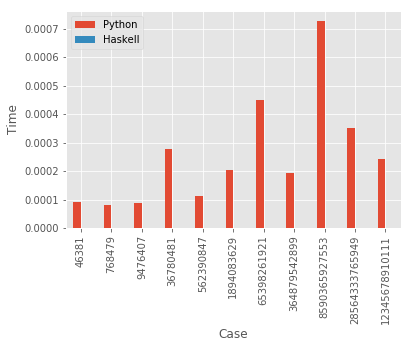

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot(name1, name2):
    df1, df2 = pd.read_csv(name1), pd.read_csv(name2)
    df1.rename(columns={'Case':'Case', 'Time':'Python'}, inplace=True)
    df2.rename(columns={'Case':'Case', 'Time':'Haskell'}, inplace=True)
    df = pd.concat([df1, df2['Haskell']], axis=1, ignore_index=False)
    df.plot(x='Case',kind='bar').set_ylabel('Time')
    return df
    
plot('MR.csv', 'MR_hs.csv')

,Case,Python,Haskell
0,46381,0.412800,0.000427
1,768479,2.811925,0.003398
2,9476407,9.626479,0.011756
3,36780481,23.124061,0.028166
4,562390847,87.518443,0.117012
5,1894083629,182.357443,0.213026
6,65398261921,1976.388882,2.174446
7,364879542899,5910.446786,6.566013


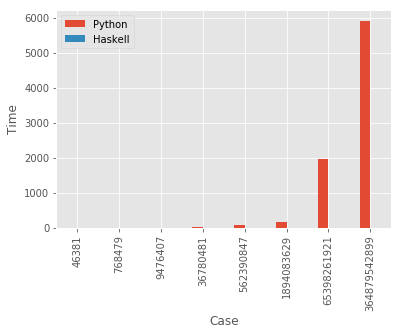

In [12]:
plot('BSGS.csv', 'BSGS_hs.csv')

,Case,Python,Haskell
0,46381,0.031056,0.000040
1,768479,0.020684,0.000035
2,9476407,0.064042,0.000044
3,36780481,0.044293,0.000039
4,562390847,0.031681,0.000048
5,1894083629,0.049024,0.000050
6,65398261921,0.031994,0.000029
7,364879542899,0.044317,0.000046
8,8590365927553,0.064605,0.000103
9,28564333765949,0.020588,0.000080


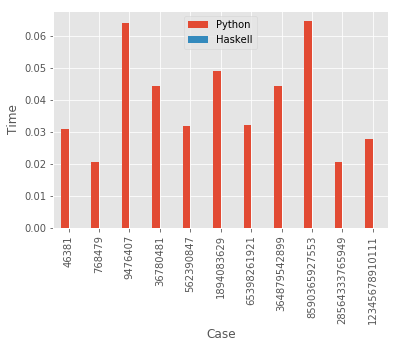

In [13]:
plot('SQRT.csv', 'SQRT_hs.csv')

En este caso, la implementación en Python, a partir del caso _1894083630_ produce tiempos muy grandes, por lo que decidí no continuar el test en Python, y realizarlo en Haskell.

,Case,Python,Haskell
0,46382,0.357970,0.019592
1,768480,0.004652,0.000361
2,9476408,15.998654,0.480304
3,36780482,677.439177,14.757176
4,562390848,0.170592,0.009333
5,1894083630,0.000000,34.481109
6,65398261922,0.000000,27.757905
7,364879542900,0.000000,0.483476
8,8590365927554,0.000000,52.302546
9,28564333765950,0.000000,58.286707


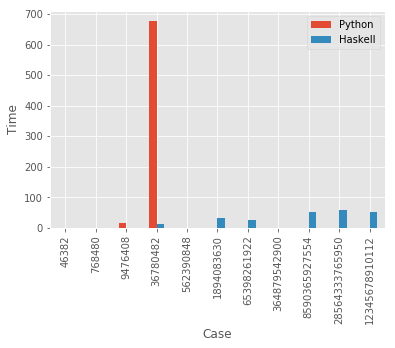

In [14]:
plot('Fermat.csv', 'Fermat_hs.csv')

,Case,Python,Haskell
0,46382,0.000015,5.199681e-08
1,768480,0.000013,5.346774e-08
2,9476408,0.000032,5.432563e-08
3,36780482,0.000032,5.396462e-08
4,562390848,0.000014,5.255667e-08
5,1894083630,0.000015,5.242047e-08
6,65398261922,0.000026,5.432629e-08
7,364879542900,0.000017,5.455622e-08
8,8590365927554,0.000035,5.360446e-08
9,28564333765950,0.000017,5.317840e-08


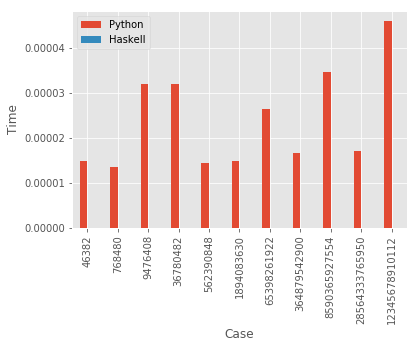

In [15]:
plot('Pollard.csv', 'Pollard_hs.csv')